## Fasttext

following tutorial https://fasttext.cc/docs/en/supervised-tutorial.html

## TODO
- prepare an input file with categories and their keywords
- prepare input file with categories and single keywords
- split datasets in training and validation
- run simple model settings (default as above)
- balance datasets for training 
 - feed GOOOGLE search words!

 
- try to use it as a word vectorizer and measure distance?

In [ ]:
# ### default way to install fasttext:

# git clone https://github.com/facebookresearch/fastText.git
# cd fastText
# pip install .

# # if there is an installation errorr with fasttext 
# # related to gcc compiler 
# # (from https://github.com/mkleehammer/pyodbc/issues/781 ):

# sudo yum install gcc-c++.x86_64
# sudo yum install python3-devel.x86_64
# sudo yum install unixODBC.x86_64
# sudo yum install unixODBC-devel.x86_64

# #replace <release_num> with the current release
# sudo ln -s /usr/libexec/gcc/x86_64-amazon-linux/<release_num>/cc1plus  /usr/bin/ 

In [304]:
## load the data
import sys
# Add src folder to the path
sys.path.append('../src/')
from data.preprocess_keywords import make_cleaned_keywords_df
from data.make_datasets import get_data
# Specify wanted time range
start_date = '2019-01-01' #'2017-01-01' #'2020-01-01' #'2017-01-01'
end_date = '2022-01-01'
# Path to data
data_file = '/home/anya_m/data/dw-project-data/CMS_2010_to_June_2022_ENGLISH.json'
# Load and extract data within time range
df_subset = get_data(data_file, start_date, end_date)
# Cleans keywords and saves data as a dataframe
#make_cleaned_keywords_df(df_subset, start_date, end_date)

Getting data...
Loading data DONE. Number of articles is 175659
Extracting data DONE. Number of articles from 2019-01-01 to 2022-01-01 is 33829


In [305]:
# Load DW data
import pandas as pd
# start_date = '2017-01-01' #'2019-01-01' #'2021-01-01'
# end_date = '2022-01-01'
filepath = '../data/interim/clean_keywords_' + start_date + '_' + end_date + '.json'
df = pd.read_json(filepath, orient ='split', compression = 'infer')

In [308]:
df.head()

,id,lastModifiedDate,Date,cleanFocusParentCategory,cleanFocusCategory,teaser,keywordStringsCleanAfterFuzz
60278,46912921,2019-01-01T03:57:28.904Z,2019-01-01,Science,Science,The OSIRIS-REx spacecraft had arrived at the l...,"[nasa, osiris-rex, bennu, asteroid]"
60279,46911356,2019-01-01T06:11:50.527Z,2019-01-01,Law and Justice,Law and Justice,The UK is withdrawing patrol ships from overse...,"[english channel, migration, boats, illegal im..."
60280,46909694,2019-01-01T06:14:35.563Z,2019-01-01,Politics,Politics,Brazil is inaugurating President Jair Bolsonar...,"[brazil, jair bolsonaro, chicago economics, ha..."
60281,46912694,2019-01-01T08:26:11.599Z,2019-01-01,Law and Justice,Crime,"A man with an ""intent to murder"" has driven a ...","[japan, tokyo, harajuku, attack]"
60282,46910092,2019-01-01T09:05:00.736Z,2019-01-01,Politics,Politics,"In an exclusive interview with DW, Kamal Hossa...","[asia, bangladesh, elections, kamal hossain, s..."


In [307]:
#add column teaser to the df cleaned dataframe

#df=df.merge(df_subset['teaser'], left_on=df_subset['id'], right_on=df['id'])
#df=df.drop(['key_0'], axis=1)
df=df.drop(['keywordStrings'], axis=1)
#add column with full text of the article into the dataframe
# df=df.merge(df_subset['text'], left_on=df['id'], right_on=df_subset['id'] )

In [309]:
#remove all NaN fields
df_clean=df.dropna(how='any')
df_clean_copy = df_clean.copy(deep=True)
##
#df_clean['cleanFocusCategory']=='Law and Justice' replace with Law-and-Justice  and other categories

##USE this instead of the next dirt fix
[el.replace(' ','-') for el in df_clean['cleanFocusParentCategory']]


# df_clean['cleanFocusParentCategory'] = df_clean['cleanFocusParentCategory'].replace(['Law and Justice'], 'Law-and-Justice')
# df_clean['cleanFocusParentCategory'] = df_clean['cleanFocusParentCategory'].replace(['Nature and Environment'], 'Nature-and-Environment')
# df_clean['cleanFocusParentCategory'] = df_clean['cleanFocusParentCategory'].replace(['Human Rights'], 'Human-Rights')
# df_clean['cleanFocusParentCategory'] = df_clean['cleanFocusParentCategory'].replace(['Cars and Transportation'], 'Cars-and-Transportation')
# #df_clean['cleanFocusCategory'] = df_clean['cleanFocusCategory'].replace(['Press Freedom'], 'Press-Freedom')
# df_clean['cleanFocusParentCategory'] = df_clean['cleanFocusParentCategory'].replace(['Digital World'], 'Digital-World')
# #df_clean['cleanFocusCategory'] = df_clean['cleanFocusCategory'].replace(['Rule of Law'], 'Rule-of-Law')
# df_clean['cleanFocusParentCategory'] = df_clean['cleanFocusParentCategory'].replace(['Learning German'], 'Learning-German')
# #df_clean['cleanFocusCategory'] = df_clean['cleanFocusCategory'].replace(['Freedom of Speech'], 'Freedom-of-Speech')

['Science',
 'Law-and-Justice',
 'Politics',
 'Law-and-Justice',
 'Politics',
 'Politics',
 'Politics',
 'Business',
 'Culture',
 'Catastrophe',
 'Sports',
 'Society',
 'Law-and-Justice',
 'Politics',
 'Politics',
 'Sports',
 'Politics',
 'Sports',
 'Sports',
 'Society',
 'Sports',
 'Science',
 'Law-and-Justice',
 'Catastrophe',
 'Business',
 'Politics',
 'Politics',
 'Politics',
 'Law-and-Justice',
 'Politics',
 'Politics',
 'Business',
 'Politics',
 'Politics',
 'Law-and-Justice',
 'Society',
 'Politics',
 'Politics',
 'Law-and-Justice',
 'Politics',
 'Society',
 'Politics',
 'Politics',
 'Law-and-Justice',
 'Politics',
 'Sports',
 'Sports',
 'Politics',
 'Politics',
 'Politics',
 'Health',
 'Business',
 'Nature-and-Environment',
 'Business',
 'Business',
 'Politics',
 'Politics',
 'Politics',
 'Cars-and-Transportation',
 'Human-Rights',
 'Politics',
 'Politics',
 'Politics',
 'Politics',
 'Politics',
 'Business',
 'Technology',
 'Nature-and-Environment',
 'Politics',
 'Culture',
 'S

In [310]:
df_clean_single_kw=df_clean.explode('keywordStringsCleanAfterFuzz')

label=df_clean['cleanFocusParentCategory'].apply(lambda x: ('__label__' +x+' '))
kw=df_clean['keywordStringsCleanAfterFuzz'].apply(lambda x: (', '.join(x)))
teaser=df_clean['teaser']

In [311]:
df_clean_single_kw=df_clean_single_kw.dropna(how='any')

In [312]:
single_kw_label=df_clean_single_kw['cleanFocusParentCategory'].apply(lambda x: ('__label__' +x+' '))
single_kw=df_clean_single_kw['keywordStringsCleanAfterFuzz']
print(single_kw_label+single_kw)

60278                        __label__Science nasa
60278                  __label__Science osiris-rex
60278                       __label__Science bennu
60278                    __label__Science asteroid
60279     __label__Law and Justice english channel
                            ...                   
172678                      __label__Health france
172678               __label__Health birth control
172678               __label__Health contraception
172678              __label__Health contraceptives
172678         __label__Health reproductive health
Length: 174696, dtype: object


In [313]:
label_kw=label+kw
label_single_kw=single_kw_label+single_kw
label_teaser=label+teaser

In [314]:
# split dataset into train and test subsets
import numpy as np
from sklearn.model_selection import train_test_split as tts
## TODO fix stratify?
def split_dataset(dataset, label):
    train_set, test_set=tts(dataset, random_state=0, test_size=0.33)#, stratify=label)
    return train_set, test_set

In [315]:
import os
def save_txt(out_name,data_to_save):
    from tqdm import tqdm
    #!rm $out_name
    if os.path.isfile(out_name):
        os.remove(out_name)
    with open(out_name,'a') as f:
        for i,el in tqdm(enumerate(data_to_save)):
            print(el,file=f)
    input_file=out_name
    return input_file

In [316]:
label_kw_train,label_kw_test=split_dataset(label_kw,label)
label_single_kw_train,label_single_kw_test=split_dataset(label_single_kw,single_kw_label)
label_teaser_train,label_teaser_test=split_dataset(label_teaser,label)

In [317]:
all_kw_train=save_txt('./fasttext/all_kw_train.txt',label_kw_train)
all_kw_test=save_txt('./fasttext/all_kw_test.txt',label_kw_test)
#all_kw_train
#!head ./fasttext/all_kw_train.txt

22471it [00:00, 366410.10it/s]
11069it [00:00, 377364.29it/s]


In [132]:
single_kw_train=save_txt('./fasttext/single_kw_train.txt',label_single_kw_train)
single_kw_test=save_txt('./fasttext/single_kw_test.txt',label_single_kw_test)

!cat ./fasttext/single_kw_train.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > ./fasttext/single_kw_train.preprocessed.txt
!cat ./fasttext/single_kw_test.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > ./fasttext/single_kw_test.preprocessed.txt

single_kw_train_prec='./fasttext/single_kw_train.preprocessed.txt'
single_kw_test_prec='./fasttext/single_kw_test.preprocessed.txt'


36980it [00:00, 201848.41it/s]
18215it [00:00, 244966.74it/s]


In [133]:
teaser_train=save_txt('./fasttext/teaser_train.txt',label_teaser_train)
teaser_test=save_txt('./fasttext/teaser_test.txt',label_teaser_test)

!cat ./fasttext/teaser_train.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > ./fasttext/teaser_train.preprocessed.txt
!cat ./fasttext/teaser_test.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > ./fasttext/teaser_test.preprocessed.txt

teaser_train_prec='./fasttext/teaser_train.preprocessed.txt'
teaser_test_prec='./fasttext/teaser_test.preprocessed.txt'


6751it [00:00, 98746.46it/s]
3326it [00:00, 110031.67it/s]


### Trying Fasttext
- DW all kw + DW cats  - training + validation
- DW all kw for training, DW single kw for validation
- DW single kw for training + validation
- DW teaser + DW cats          - training + validation

implement train_test_split for splitting dataset

- DW teaser / kw for training , google for ???
- - validation based on similarity of google to DW kw (rapidfuzz? cdist / word embeddings using fasstext)

- - make graphics to compare categories from DW and Google

- DW text for training, DW kw for validation
- - clean html (beautiful soup?)

In [318]:
import fasttext

In [135]:
#OLD way . now replaced with tran test split

# # single kw 
# #preprocessing and 
# #splittig into training and validation sets
# !cat ./fasttext/single_kw.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > ./fasttext/single_kw.preprocessed.txt

# !head -n 300000 ./fasttext/single_kw.preprocessed.txt > ./fasttext/single_kw_cl.train
# !tail -n 60000 ./fasttext/single_kw.preprocessed.txt > ./fasttext/single_kw_cl.valid

In [319]:
def fasttext_classifier(train_file,test_file,lr=1.0,epoch=12,k=1,wordNgrams=1):
    model = fasttext.train_supervised(input=train_file, lr=lr, epoch=epoch)
    #model.test(test_file,k=k)
    print(model.test(test_file,k=1))
    print(model.test(test_file,k=2))
    print(model.test(test_file,k=3))
    print(model.test(test_file,k=4))
    print(model.test(test_file,k=5))
    return model

In [320]:
model_all_kw_check=fasttext_classifier(all_kw_train,all_kw_test,lr=1,wordNgrams=2)
#model_all_kw_check.test(all_kw_test)

Read 0M words
Number of words:  22575
Number of labels: 24
Progress: 100.0% words/sec/thread:  343518 lr:  0.000000 avg.loss:  0.466359 ETA:   0h 0m 0s


(11069, 0.7613153853103262, 0.7613153853103262)
(11069, 0.4359924112385943, 0.8719848224771886)
(11069, 0.30514650525491616, 0.9154395157647484)
(11069, 0.2343707652001084, 0.9374830608004336)
(11069, 0.1904417743246906, 0.9522088716234529)


In [138]:
model_single_kw_check=fasttext_classifier(single_kw_train,single_kw_test,lr=0.7,wordNgrams=2)
#model_single_kw_check.test(single_kw_test)

Read 0M words
Number of words:  8957
Number of labels: 24
Progress: 100.0% words/sec/thread:  150044 lr:  0.000000 avg.loss:  2.183739 ETA:   0h 0m 0s


(18215, 0.5172110897611858, 0.5172110897611858)
(18215, 0.32486961295635464, 0.6497392259127093)
(18215, 0.24144935492725775, 0.7243480647817733)
(18215, 0.1950041174855888, 0.7800164699423552)
(18215, 0.16383200658797695, 0.8191600329398847)


In [139]:
fasttext_classifier(single_kw_train,single_kw_test,lr=0.7,wordNgrams=5)
#model_single_kw_check.test(single_kw_test)

Read 0M words
Number of words:  8957
Number of labels: 24
Progress:  96.3% words/sec/thread:  175598 lr:  0.026103 avg.loss:  2.264832 ETA:   0h 0m 0s

(18215, 0.5189129838045566, 0.5189129838045566)
(18215, 0.3245951139171013, 0.6491902278342025)
(18215, 0.24278525025162412, 0.7283557507548724)
(18215, 0.19622563821026626, 0.784902552841065)
(18215, 0.16426022508921218, 0.8213011254460609)


Progress: 100.0% words/sec/thread:  176101 lr:  0.000000 avg.loss:  2.226243 ETA:   0h 0m 0s


In [140]:
fasttext_classifier(single_kw_train_prec,single_kw_test_prec,lr=0.7)
#model_single_kw_check_prec.test(single_kw_test_prec)

Read 0M words
Number of words:  8944
Number of labels: 24
Progress: 100.0% words/sec/thread:  189252 lr:  0.000000 avg.loss:  2.375539 ETA:   0h 0m 0s


(18215, 0.5179796870710952, 0.5179796870710952)
(18215, 0.3244029645896239, 0.6488059291792478)
(18215, 0.24187025345411292, 0.7256107603623387)
(18215, 0.1959923140269009, 0.7839692561076036)
(18215, 0.16391984628053802, 0.8195992314026901)


In [141]:
model_teaser=fasttext_classifier(teaser_train,teaser_test)

Read 0M words
Number of words:  27229
Number of labels: 24
Progress: 100.0% words/sec/thread:  704757 lr:  0.000000 avg.loss:  0.616659 ETA:   0h 0m 0s


(3326, 0.5775706554419724, 0.5775706554419724)
(3326, 0.35342754058929643, 0.7068550811785929)
(3326, 0.25987171777911405, 0.7796151533373421)
(3326, 0.20738123872519543, 0.8295249549007817)
(3326, 0.1714371617558629, 0.8571858087793145)


In [142]:
model_teaser=fasttext_classifier(teaser_train_prec,teaser_test_prec)

Read 0M words
Number of words:  18713
Number of labels: 24
Progress: 100.0% words/sec/thread:  947818 lr:  0.000000 avg.loss:  0.630961 ETA:   0h 0m 0s100.0% words/sec/thread:  947853 lr: -0.000001 avg.loss:  0.630961 ETA:   0h 0m 0s


(3326, 0.6016235718580878, 0.6016235718580878)
(3326, 0.3707155742633794, 0.7414311485267588)
(3326, 0.2721988374423732, 0.8165965123271197)
(3326, 0.21309380637402284, 0.8523752254960913)
(3326, 0.17606734816596512, 0.8803367408298256)


In [143]:
model_teaser=fasttext_classifier(teaser_train_prec,teaser_test_prec,wordNgrams=3)

Read 0M words
Number of words:  18713
Number of labels: 24
Progress: 100.0% words/sec/thread:  947926 lr:  0.000000 avg.loss:  0.648228 ETA:   0h 0m 0s


(3326, 0.6010222489476849, 0.6010222489476849)
(3326, 0.3713168971737823, 0.7426337943475646)
(3326, 0.27119663259170174, 0.8135898977751053)
(3326, 0.21346963319302464, 0.8538785327720986)
(3326, 0.17636800962116655, 0.8818400481058328)


In [144]:
model_teaser_single=fasttext_classifier(teaser_train_prec,single_kw_test_prec)

Read 0M words
Number of words:  18713
Number of labels: 24
Progress: 100.0% words/sec/thread:  787636 lr:  0.000000 avg.loss:  0.565156 ETA:   0h 0m 0s100.0% words/sec/thread:  787664 lr: -0.000062 avg.loss:  0.565156 ETA:   0h 0m 0s


(18215, 0.3547076585231952, 0.3547076585231952)
(18215, 0.2149052978314576, 0.4298105956629152)
(18215, 0.15847744532894134, 0.47543233598682405)
(18215, 0.12744990392533626, 0.509799615701345)
(18215, 0.10993137524018666, 0.5496568762009333)


In [145]:
# #automatic search for best hyperparameters https://fasttext.cc/docs/en/autotune.html 
# #last 5 minutes
# model_best = fasttext.train_supervised(input=train_file, autotuneValidationFile='./fasttext/output_cl.valid')
# model_best.test('./fasttext/output_cl.valid')

In [146]:
#The output are the number of samples (here 14999), 
# the precision at one (0.6968)  69% and 
# the recall at one (0.0541).

#The precision is the number of correct labels among the labels predicted by fastText. 
# The recall is the number of labels that successfully were predicted,
# among all the real labels. 

With a few steps, we were able to go from a precision at one of 12.4% to 59.9%. Important steps included:

- preprocessing the data ;
- changing the number of epochs (using the option -epoch, standard range [5 - 50]) ;
- changing the learning rate (using the option -lr, standard range [0.1 - 1.0]) ;
- using word n-grams (using the option -wordNgrams, standard range [1 - 5]).

In [147]:
# function to run predictions for a single kw and 
# make list of labels 
def prediction(model, keyword,k=1):
    x=model.predict(keyword,k=k)
    list_label=[]
    for k in range(1,k+1):
        pred_label=(x[0][k-1].split('__')[2])
        list_label.append(pred_label)
        tuple_label=tuple(list_label)
    return tuple_label


#list_labels=prediction(model_all_kw_check,selected_keyword,k=1)

In [335]:
#prediction for list of input keywords
def run_predict_for_series(model,series_kw):
    list_of_series = []
    for selected_keyword in series_kw:
        #print(selected_keyword)
        list_of_k = [k for k in range(1,3)]
        predictions = [prediction(model,selected_keyword,k=i) for i in list_of_k]
        predictions = pd.Series(predictions, index=list_of_k, name=selected_keyword)
        list_of_series.append(predictions)

    result = pd.concat(list_of_series, axis=1).T
    return result


In [149]:
#count amount of predictions for each category
def count_values_for_columns(result):
    val_counts_for_cols = {}
    for col in result.columns:
        val_counts = result.explode(col)[col].value_counts()
        val_counts_for_cols[col] = val_counts
    return val_counts_for_cols

In [150]:
#plot pie chart
import matplotlib.pyplot as plt
import seaborn as sns

#define data

def plot_pie(data, labels,title):
    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:25]

    #create pie chart
    plt.title(title)
    plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
    plt.show()

In [396]:
# make df with dw categories and extracted labels
new_labels = single_kw_label.str.split('__').apply(lambda row: row[2]).str.strip()

d={'dw_cat':new_labels,'dw_kw':single_kw}#,'pred_cat1','pred_cat2','pred_cat3','pred_cat4','pred_cat5'}
df_single=pd.DataFrame(data=d)

new_all_labels=label.str.split('__').apply(lambda row: row[2]).str.strip()
d_all={'dw_cat':new_all_labels,'dw_kw':kw}#,'pred_cat1','pred_cat2','pred_cat3','pred_cat4','pred_cat5'}
df_all=pd.DataFrame(data=d_all)

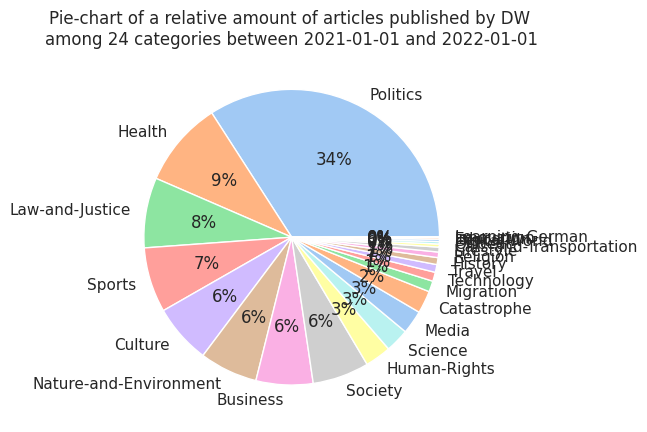

In [153]:
#count_values_for_columns(df_single)['dw_cat']

data_dw = count_values_for_columns(df_single)['dw_cat'].values
labels_dw = count_values_for_columns(df_single)['dw_cat'].index
title=('Pie-chart of a relative amount of articles published by DW \n'+
       'among ' +str(len(labels_dw)) + ' categories between ' +start_date+' and ' +end_date)

plot_pie(data_dw,labels_dw,title)

In [154]:
#google keywords to dw categories
# Load Google data
google_usa_json='../data/interim/2021-daily-trending-searches.json'
google_world_json='../data/interim/2021_daily_trending_searches_World.json'
df_google = pd.read_json(google_world_json, orient ='split', compression = 'infer')

# Keeps only google data within DW data date range
start_date_dw=start_date
end_date_dw=end_date
df_google.sort_values(by ='date', inplace = True) 
mask = (pd.to_datetime(df_google['date']) > start_date_dw) & (pd.to_datetime(df_google['date']) <= end_date_dw)
df_google_subset = df_google.loc[mask].copy()
google_topic=df_google_subset['topic_title']
google_topic_type=df_google_subset['topic_title']

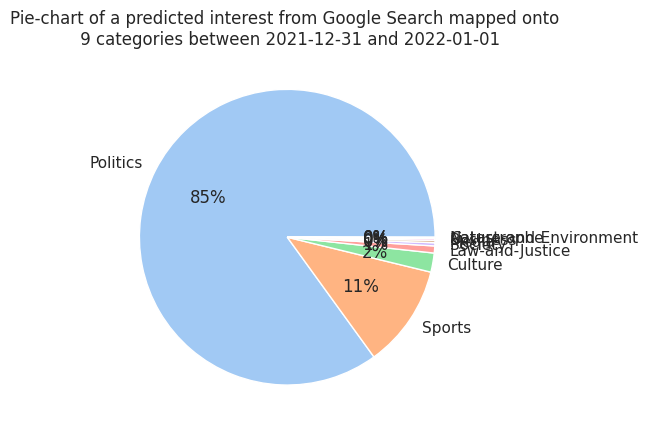

In [155]:
#predict categories for google searches topic title+type
google_data=df_google_subset['topic_title']+' '+df_google_subset['topic_type']

#google_result=run_predict_for_series(model_all_kw_check,df_google_subset['topic_type']) #only topic type
#google_result=run_predict_for_series(model_all_kw_check,df_google_subset['topic_title']) #only topic title
google_result=run_predict_for_series(model_all_kw_check,google_data) #topic title+type

#count amount GS words for each category
#count_values_for_columns(google_result)[1]
data_g = count_values_for_columns(google_result)[1].values
labels_g = count_values_for_columns(google_result)[1].index

google_start_date='2021-12-31'
#make pie plot for google searches
title_g=('Pie-chart of a predicted interest from Google Search mapped onto \n'+
       ' ' +str(len(labels_g)) + ' categories between ' +google_start_date+' and ' +end_date)

plot_pie(data_g,labels_g,title_g)

## Bar plots
bar plot to compare DW categories and Google categories 
for the same time period

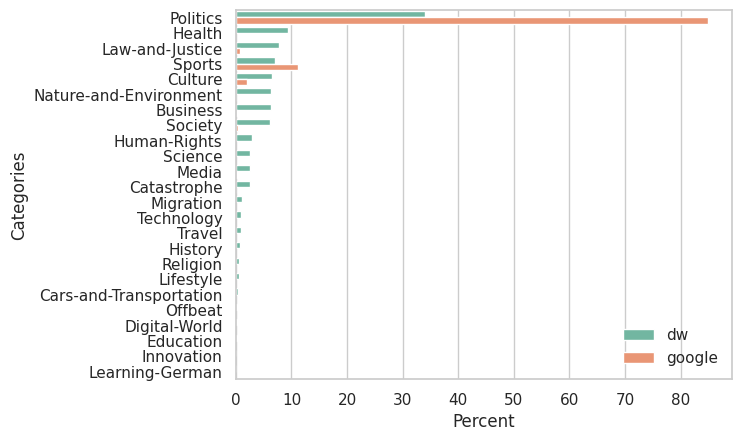

In [215]:
import seaborn as sns
#sns.set_theme(style="whitegrid")

ds2 = pd.DataFrame({'Categories':labels_dw,'Percent':100*data_dw/data_dw.sum().round(1)})
ds1 = pd.DataFrame({'Categories':labels_g,'Percent':100*data_g/data_g.sum().round(1)})
# for cat in ds2['Categories'].unique():
#     if cat not in ds1['Categories'].unique():
#         ds1.loc[len(ds1)] = [cat, 0]

ds2['source'] = 'dw'
ds1['source'] = 'google'
dss = pd.concat([ds2, ds1])

#sns.barplot(x='Categories', y='Percent', hue='source', data=dss, palette='Set2')
sns.barplot(x='Percent', y='Categories', hue='source', data=dss, palette='Set2')
sns.color_palette("deep")
#g=plt.tight_layout()
#g=plt.xticks(rotation=90)
#plt.yticks(rotation=90)
plt.legend(loc='lower right',frameon=False)
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("Categories lala")
ax.grid(False)


## Heatmap 

In [458]:
dw_result=run_predict_for_series(model_all_kw_check,kw) 
dw_data = count_values_for_columns(dw_result)[1].values
dw_labels = count_values_for_columns(dw_result)[1].index


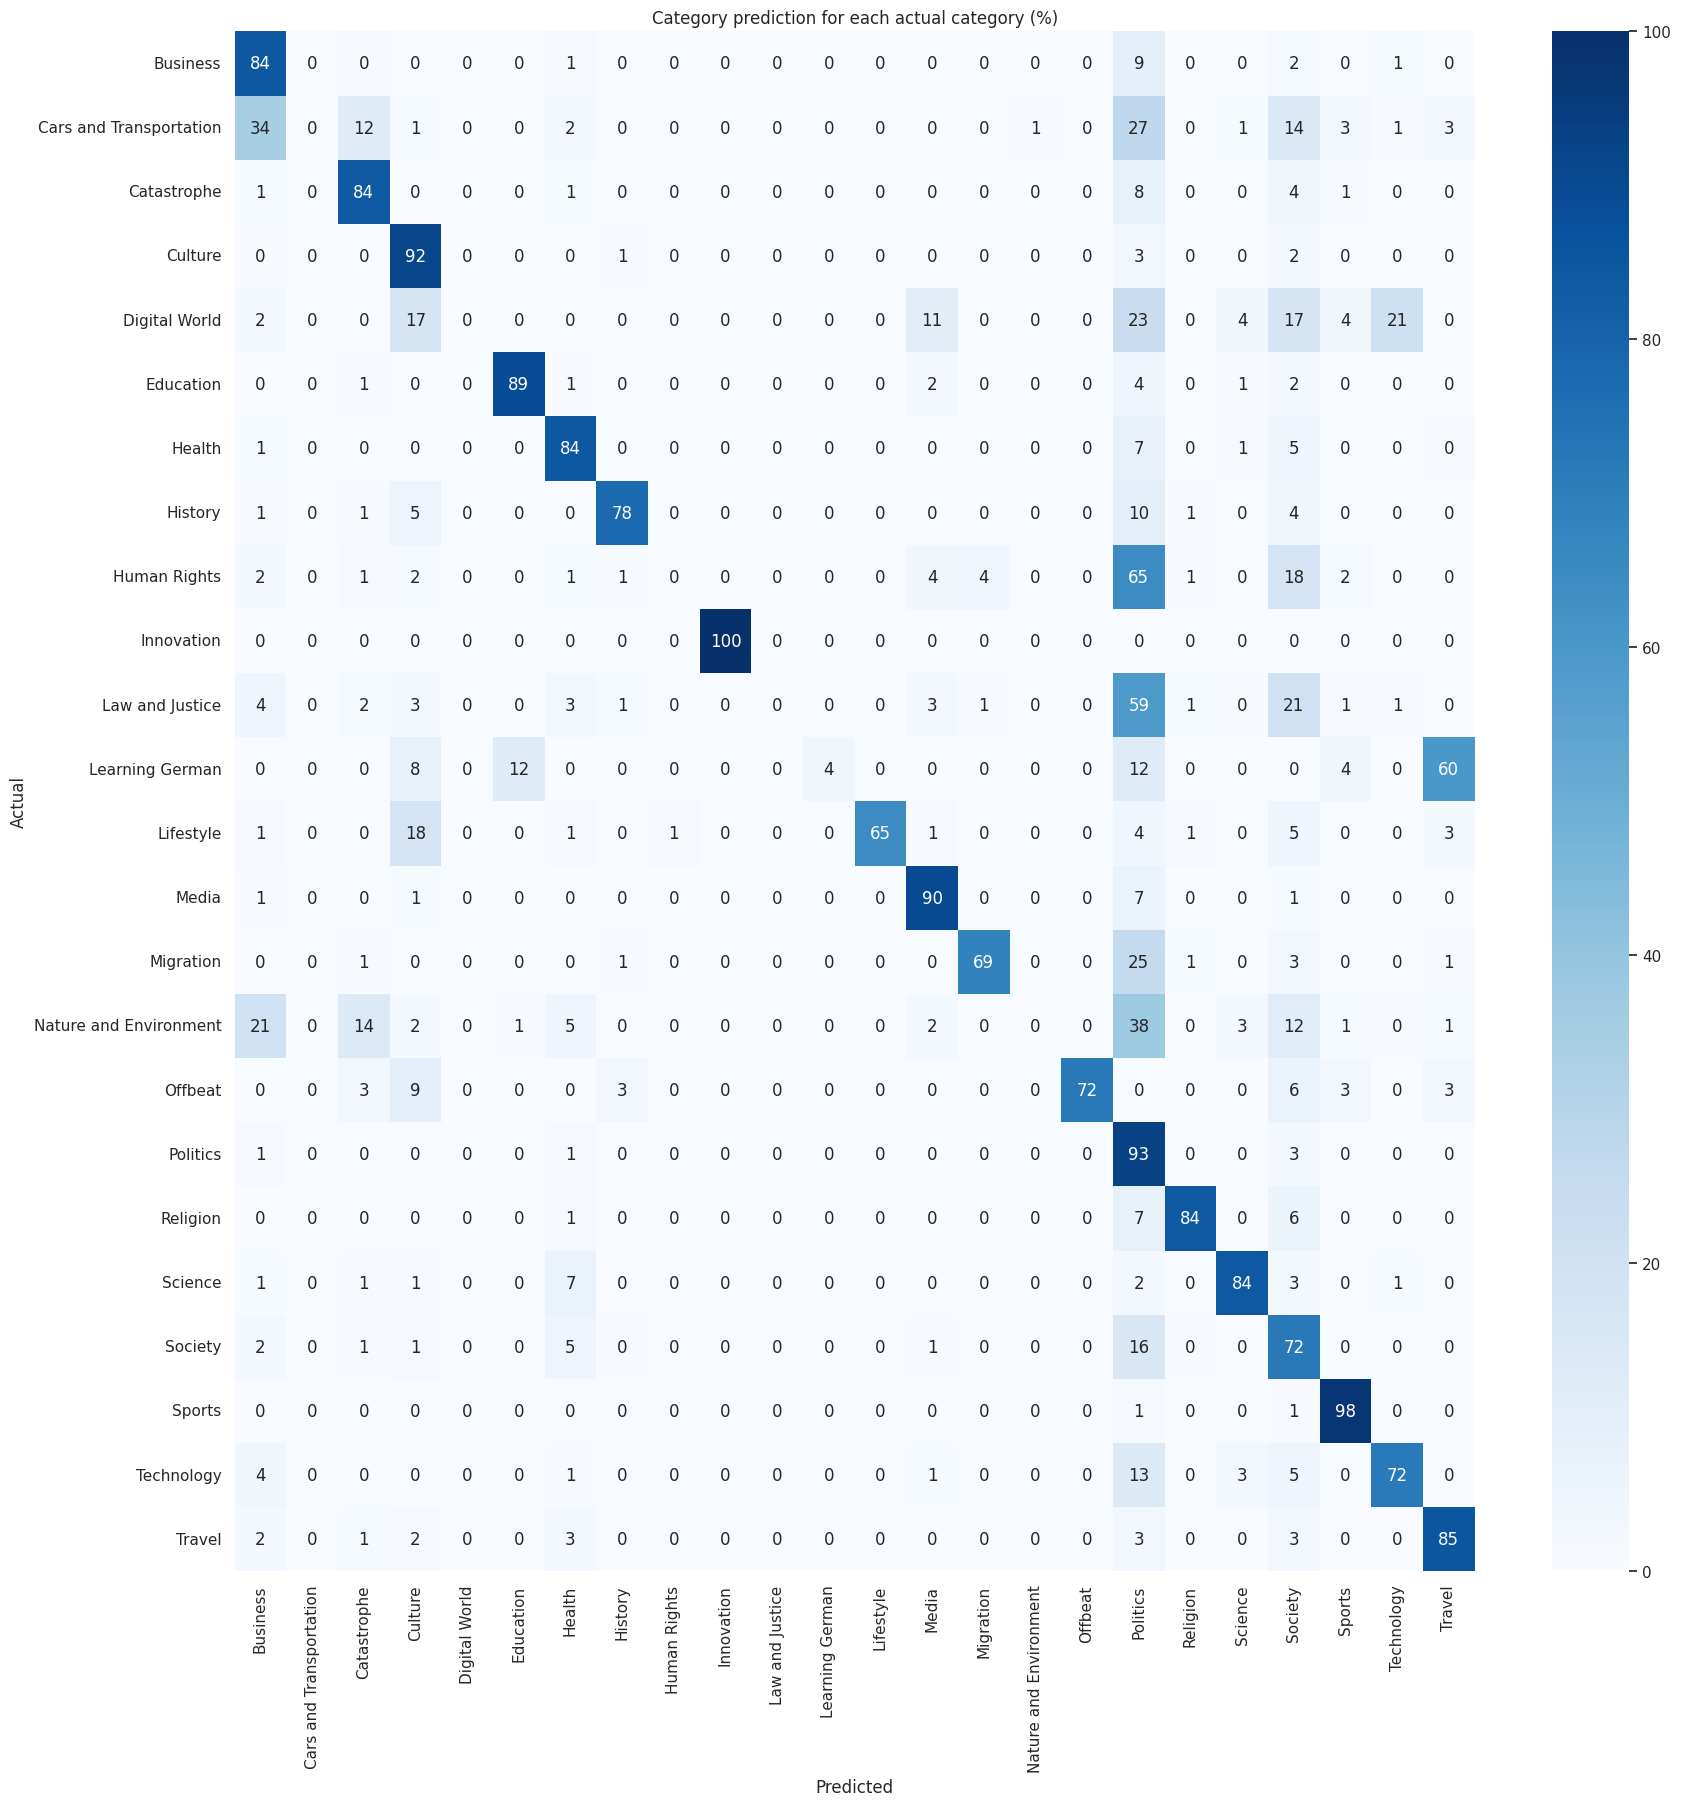

In [483]:
#HeatMap for predicting dw categories based on dw data
#actual categories
#predicted categories
# model = LinearSVC()
# X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_clean.index, test_size=0.33, random_state=0,stratify=labels)
# model.fit(X_train, y_train)
category_id_df=df_all['dw_cat'].drop_duplicates().sort_values() #result['dw_cat'].drop_duplicates().sort_values() #data #count_values_for_columns(result)['dw_cat'].index

y_test= df_all['dw_cat'].reset_index().drop(['index'],axis=1) #count_values_for_columns(df_single)['dw_cat'].values
y_pred = dw_result.reset_index()[1].explode() #count_values_for_columns(result)[1].index
#very dirty fix for now
y_pred=pd.DataFrame([el.replace('Law','Law and Justice').replace('Nature','Nature and Environment').replace('Human','Human Rights').replace('Learning','Learning German') for el in y_pred])
from sklearn.metrics import confusion_matrix


conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(100*conf_mat/conf_mat.sum(axis=1)[:,None], annot=True, fmt='.0f', cmap='Blues', xticklabels=category_id_df.values, yticklabels=category_id_df.values)
#sns.heatmap(conf_mat, annot=True, xticklabels=category_id_df.values, yticklabels=category_id_df.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Category prediction for each actual category (%)')
plt.show()

In [ ]:


# #alternative plot for google predictions when predicting 2 categories with fasttext
# title_g2=('Pie-chart of a predicted interest from Google Search mapped onto \n'+
#        ' ' +str(len(labels)) + ' categories between ' +start_date+' and ' +end_date+
#        '\n when predicting 2 categories')
# data_g2 = count_values_for_columns(google_result)[2].values
# labels_g2 = count_values_for_columns(google_result)[2].index

# plot_pie(data_g2,labels_g2,title_g2)

## Pie charts 2

In [186]:
#DW
#predict dw category for each kw
result=run_predict_for_series(model_all_kw_check,single_kw)

result=result.merge(df_single, left_index=True, right_on='dw_kw')
#count_values_for_columns(result)[]

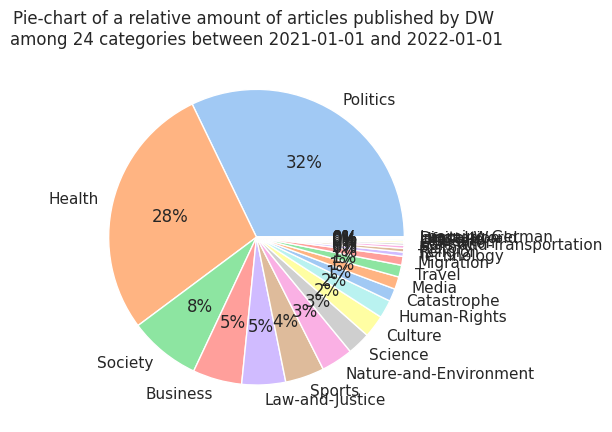

In [187]:
#plot predicted DW categories
data = count_values_for_columns(result)['dw_cat'].values
labels = count_values_for_columns(result)['dw_cat'].index
title=('Pie-chart of a relative amount of articles published by DW \n'+
       'among ' +str(len(labels)) + ' categories between ' +start_date+' and ' +end_date)


plot_pie(data,labels,title)